# Simple Linear regression 

In [1]:
import pandas as pd                  # importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
wcat= pd.read_csv("E:\\DATA SCIENCE\\REGRESSION\\simple linear Regression\\Dataset\\wc-at.csv") # Loading the dataset 

In [3]:
wcat # Checking the dataset 

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [4]:
wcat.describe() # Describing the dataset 

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [5]:
wcat.info()  #Info about the dataset  like data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
wcat.shape   # shape of the dataset

(109, 2)

# Univariate Analysis (AT) 

<BarContainer object of 109 artists>

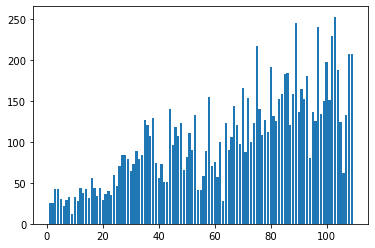

In [81]:
plt.bar(height = wcat.AT, x = np.arange(1, 110, 1))    # Bar plot 

(array([[ 0.,  0., 41., 53., 15.,  0.,  0.,  0.,  0.,  0.],
        [14., 18., 16., 13., 17., 14.,  4.,  6.,  3.,  4.]]),
 array([ 11.44 ,  35.596,  59.752,  83.908, 108.064, 132.22 , 156.376,
        180.532, 204.688, 228.844, 253.   ]),
 <a list of 2 BarContainer objects>)

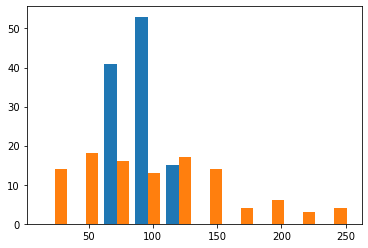

In [8]:
plt.hist(wcat)     # Histogram 

{'whiskers': [<matplotlib.lines.Line2D at 0x2329304b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2329304bd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2329304b370>],
 'medians': [<matplotlib.lines.Line2D at 0x23293058490>],
 'fliers': [<matplotlib.lines.Line2D at 0x232930587f0>],
 'means': []}

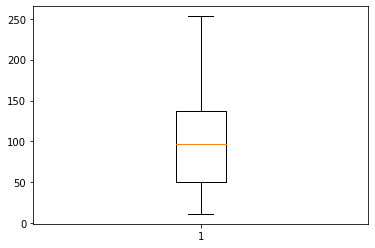

In [9]:
plt.boxplot(wcat.AT)  #Boxplot 

# Univariate analysis (Waist)

<BarContainer object of 109 artists>

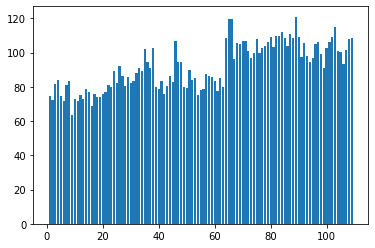

In [10]:
plt.bar(height = wcat.Waist, x=np.arange(1,110,1))  #Bar Plot 

(array([ 2.,  9., 19., 17., 11.,  9., 13., 21.,  5.,  3.]),
 array([ 63.5 ,  69.25,  75.  ,  80.75,  86.5 ,  92.25,  98.  , 103.75,
        109.5 , 115.25, 121.  ]),
 <BarContainer object of 10 artists>)

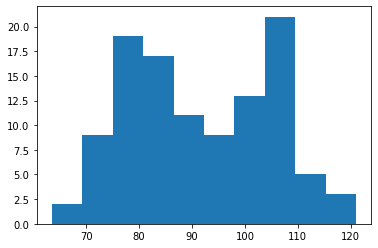

In [82]:
plt.hist(wcat.Waist)  #Histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x232932abca0>,
 'caps': [<matplotlib.lines.Line2D at 0x232932b93a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x232932ab940>],
 'medians': [<matplotlib.lines.Line2D at 0x232932b9a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x232932b9dc0>],
 'means': []}

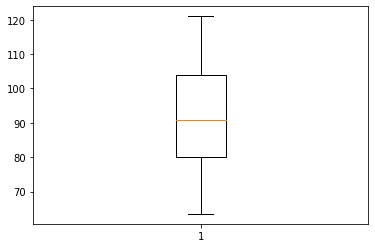

In [12]:
plt.boxplot(wcat.Waist)        #Boxplot 

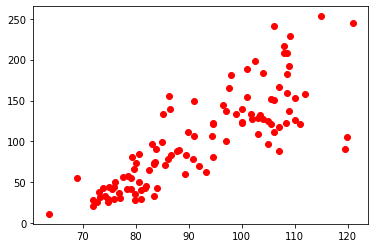

In [13]:
plt.scatter(wcat.Waist, wcat.AT, color='red')   #Bivariate Analysis 

In [14]:
np.corrcoef(wcat.Waist, wcat.AT)    # Correlation ( relationship between two features ranges from -1 to +1 )

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [86]:
cov = np.cov(wcat.Waist, wcat.AT) [0,1]     #Covariance (ranges from -∞ to +∞)
cov

635.9100064135235

# Model Building (x = Waist , y = AT)

In [19]:
import statsmodels.formula.api as smf  #importing stats models

In [20]:
model1 = smf.ols('AT ~ Waist', data = wcat).fit()    #fitting the model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           1.62e-27
Time:                        22:10:39   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred1 = model1.predict(pd.DataFrame(wcat['Waist']))         #predicting the values 
pred1

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

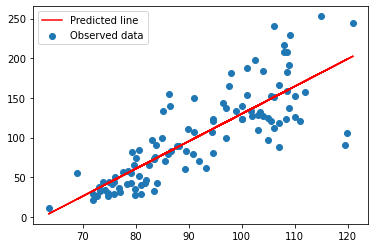

In [22]:
plt.scatter(wcat.Waist, wcat.AT)                       #Regression Line 
plt.plot(wcat.Waist, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Evaluation metrics

In [25]:
res1= wcat.AT-pred1             # Calculating residuals 
res1

0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [26]:
res_sqr = res1 * res1       #Squaring the residuals 
res_sqr

0       283.863582
1        85.409091
2       593.078852
3       997.912810
4       153.322979
          ...     
104      39.066715
105    1982.929211
106       9.799393
107    2577.649718
108    2371.226781
Length: 109, dtype: float64

In [27]:
mse1 = np.mean(res_sqr)             #Calculating Mean Squared Error
mse1

1073.2292295533819

In [28]:
rmse1= np.sqrt(mse1)             # Calculating RMSE 
rmse1

32.760177495755144

# Applying Transformations (X = log(Waist), Y = AT )

array([[1.        , 0.82177819],
       [0.82177819, 1.        ]])

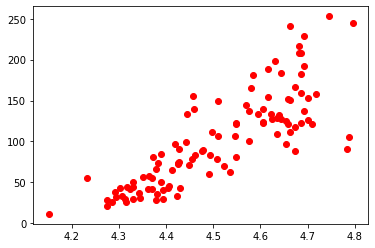

In [29]:
plt.scatter (x = np.log(wcat['Waist']), y = wcat['AT'], color = 'red')       # Scatter Plot 
np.corrcoef(np.log(wcat.Waist),wcat.AT)

In [33]:
model2 = smf.ols('AT~ np.log(Waist)', data = wcat).fit()          #Fitting the model 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           6.80e-28
Time:                        22:11:25   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred2 = model2. predict(pd.DataFrame(wcat['Waist']))            # Predicting the values 
pred2 

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

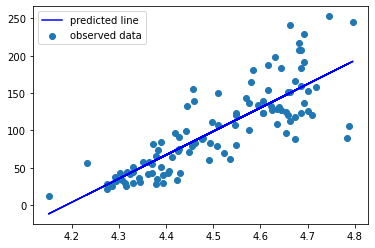

In [35]:
plt.scatter (np.log(wcat.Waist), wcat.AT)                   #Regression Line 
plt.plot(np.log(wcat.Waist),pred2, "blue")
plt.legend(['predicted line','observed data'])
plt.show()


# Evaluation Metrics

In [36]:
res2 = wcat.AT - pred2                 # Calculating residuals ( Residuals = Actual - prediction values )
res2

0     -14.108156
1      -4.682779
2     -25.810960
3     -33.838769
4      -9.563610
         ...    
104    -8.438233
105   -47.927880
106    -4.778929
107    51.765441
108    50.006829
Length: 109, dtype: float64

In [37]:
res3 = res2* res2
res3

0       199.040053
1        21.928420
2       666.205636
3      1145.062291
4        91.462634
          ...     
104      71.203782
105    2297.081689
106      22.838160
107    2679.660844
108    2500.682903
Length: 109, dtype: float64

In [38]:
mse2= np.mean(res3)        # Calcualating Mean Sqaured Error 
mse2

1056.047528809672

In [39]:
rmse2= np.sqrt(mse2)      # Calucating RMSE 
rmse2

32.49688490932126

# ( X = Waist, Y = log(AT))

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

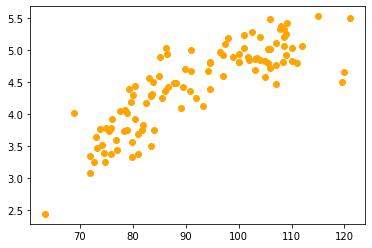

In [87]:
plt.scatter(x = wcat['Waist'], y = np.log(wcat['AT']), color = 'orange')
np.corrcoef(wcat.Waist, np.log(wcat.AT))                                        #correlation

In [88]:
model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()     #Fitting the model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           2.68e-30
Time:                        23:01:59   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<ipython-input-90-7f6b3117f37d>:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(x= wcat['Waist'],y = np.log(wcat['AT']), Color ='green')


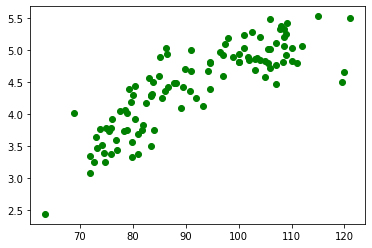

In [90]:
plt.scatter(x= wcat['Waist'],y = np.log(wcat['AT']), Color ='green')   #Scatter plot

In [42]:
np.corrcoef(wcat.Waist , np.log(wcat.AT))

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

In [43]:
model3 = smf.ols('np.log(AT) ~ Waist', data = wcat).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           2.68e-30
Time:                        22:11:34   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
pred3 = model3. predict(pd.DataFrame(wcat['Waist']))
pred3 = np.exp(pred3)
pred3

0       42.516361
1       38.991601
2       56.467684
3       61.572246
4       42.345566
          ...    
104    117.953181
105     89.709020
106    126.307181
107    161.459872
108    165.406833
Length: 109, dtype: float64

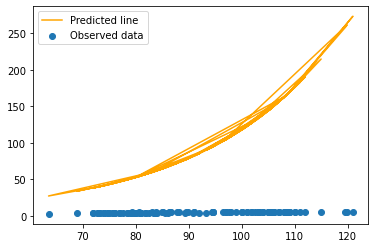

In [58]:
plt.scatter (wcat.Waist , np.log(wcat.AT))
plt.plot(wcat.Waist, pred3, "orange")
plt.legend(['Predicted line','Observed data'] )
plt.show()

In [59]:
res4= wcat.AT - pred3
res5= res4 * res4
mse3 = np.mean(res5)
rmse3 = np.sqrt(mse3)
rmse3

38.529001758071445

# Ploynomial Tranformation 

In [60]:
model4 = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = wcat).fit()      #Fitting the model
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           1.80e-35
Time:                        22:16:22   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist                0.2289      0.032      7.107      0.000       0.165       0.293
I(Waist * Waist)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
pred4 = model4.predict(pd.DataFrame(wcat))        #Predicting the values 
pred4 = np.exp(pred4)
pred4

0       36.779400
1       31.026570
2       60.145769
3       68.488132
4       36.497176
          ...    
104    134.555999
105    108.012957
106    140.081911
107    154.205675
108    155.034904
Length: 109, dtype: float64

In [62]:
from sklearn.preprocessing import PolynomialFeatures  
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)

In [63]:
res4 = wcat.AT - pred4         #Evaluation Metrics 
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

32.24444782776248

In [ ]:
#Comparing the models error 

In [91]:
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse                        

,MODEL,RMSE
0,SLR,32.760177
1,Log model,32.496885
2,Exp model,38.529002
3,Poly model,32.244448


In [66]:
from sklearn. model_selection import train_test_split

In [73]:
train, test = train_test_split(wcat, test_size= 0.2)

In [ ]:
#Final Model that we have low RMSE is poly model 

In [74]:
finalmodel = smf.ols('np.log(AT) ~ Waist + I(Waist*Waist)', data = train).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sat, 18 Sep 2021   Prob (F-statistic):           5.70e-28
Time:                        22:19:59   Log-Likelihood:                -23.832
No. Observations:                  87   AIC:                             53.66
Df Residuals:                      84   BIC:                             61.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -7.2662      1.626     -4.470      0.000     -10.499      -4.034
Waist                0.2156      0.036      6.065      0.000       0.145       0.286
I(Waist * Waist)    -0.0009      0.000     -4.922      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.320
Skew:                           0.111   Prob(JB):                        0.852
Kurtosis:                       2.802   Cond. No.                     4.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

56     82.454047
17     34.750411
0      36.362312
24     59.614775
86    160.303582
         ...    
83    161.252997
73    132.689944
13     49.171934
97    128.965741
38     52.530648
Length: 87, dtype: float64

In [93]:
train_res = train.AT - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse


33.58285045703089

In [94]:
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

104    133.054468
22      52.189118
79     157.530380
58      73.053537
45     153.864663
11      37.048407
98      95.977155
84     156.660397
67     150.051917
43      77.095472
59      65.991152
29      61.458057
75     132.689944
48      51.509799
94     121.142708
81     159.060399
37     142.899078
61      70.667008
63     156.293179
20      42.389361
9       32.298358
31      83.704838
dtype: float64

In [95]:
test_res = test.AT - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

26.295804515804264

In [ ]:
# AS, we got the training the training Value is 33.5 and testing value is 26.2. So, that we can use final model as Poly model.